# Diabetes_Random_Forest_with_DT_comparision

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier , GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
# from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [2]:
# Refer precision and recall wiki

In [3]:
(2*((12/17)*(12/16))) / ((12/17)+(12/16)) 

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


0.7272727272727272

In [4]:
import math
math.sqrt(((50-45)**2)+((60-62)**2))

5.385164807134504

In [5]:
((25*30) + (40*42)) / (math.sqrt((25**2)+(40**2)) * math.sqrt((30**2)+(42**2)))

0.9981002300559684

In [6]:
# For algortihms using distance based calculation we need to use scaling



# Z score sclaing
#               __
# Z score = x - x   
#           ______
#            std(x)

In [7]:
age    = np.array([25,30,50,45])
# Z score(scaling) for age
(age - np.mean(age)) / np.std(age,ddof = 1)


array([-1.05021006, -0.63012604,  1.05021006,  0.63012604])

In [8]:
weight = np.array([40,42,60,62])
# Z score(sclaing) for weight
(weight - np.mean(weight)) / np.std(weight , ddof = 1)

array([-0.94790023, -0.77555474,  0.77555474,  0.94790023])

In [9]:
np.sqrt(((-1.05)-(-0.63))**2) + (((-0.947)-(-0.775))**2)

0.44958400000000004

In [10]:
(28 - np.mean(age)) / np.std(age , ddof = 1)

-0.7981596478959656

In [11]:
(45 - np.mean(weight)) / np.std(weight , ddof = 1)

-0.5170364906592835

In [12]:
np.sqrt((((0.63)-(-0.798))**2) + (((0.947)-(-0.517))**2))

2.0451112439180417

In [13]:
import os
os.getcwd()

'C:\\Users\\Netra'

In [14]:
data = pd.read_csv("column_2c_weka.csv")

In [15]:
# outcome variable is class
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [16]:
# ROws and columns
data.shape

(310, 7)

In [17]:
data.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [18]:
#correlation matrix is not including outcome variable because it is in stirng format

In [19]:
data["class"].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [20]:
data.replace({"Normal":0,"Abnormal":1} , inplace = True)

In [21]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [22]:
# perform 2 sample ttest tocheck means are significantly different or not
from scipy.stats import ttest_ind

In [23]:
df0 = data[data["class"]==0]
df1 = data[data["class"]==1]

In [24]:
df0.shape,df1.shape

((100, 7), (210, 7))

In [25]:
# performing test for pelvicincidence
ttest_ind(df0["pelvic_incidence"] , df1["pelvic_incidence"])

Ttest_indResult(statistic=-6.6285856350132955, pvalue=1.516337137438054e-10)

In [26]:
# Means are significantly different between normal and abnormal

In [27]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [28]:
# we need to skip the last column class
data.columns[:-1]

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

In [29]:
for i in data.columns[:-1]:
    t_test,p_val = ttest_ind(df0[i] , df1[i])
    print(i,"\t\t",p_val)

pelvic_incidence 		 1.516337137438054e-10
pelvic_tilt numeric 		 4.122674154069914e-09
lumbar_lordosis_angle 		 1.898448510588465e-08
sacral_slope 		 0.00018769555657203096
pelvic_radius 		 2.5290220394265647e-08
degree_spondylolisthesis 		 2.2012863107202555e-16


In [30]:
X = data.drop("class",axis = 1)
Y = data["class"]

In [31]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

In [32]:
# we should scale x and not y
sc=StandardScaler()
X_scaled = sc.fit_transform(X)

In [33]:
# after scaling we need to perform gridsearch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeClassifier        
from sklearn.ensemble     import RandomForestClassifier

In [34]:
from sklearn.model_selection import GridSearchCV
knn =  KNeighborsClassifier()
param = {"n_neighbors" : np.arange(1,50) , "weights" : ["uniform","distance"]}
GS = GridSearchCV(knn, param , cv = 3 ,scoring = "roc_auc")
GS.fit(X,Y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [35]:
GS.best_params_

{'n_neighbors': 40, 'weights': 'uniform'}

In [36]:
# GridSearch CV returns the best hyper parameter for the model

In [37]:
#Pass scaled X
from sklearn.model_selection import GridSearchCV
knn =  KNeighborsClassifier()
param = {"n_neighbors" : np.arange(1,50) , "weights" : ["uniform","distance"]}
GS = GridSearchCV(knn, param , cv = 3 ,scoring = "roc_auc")
GS.fit(X_scaled,Y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [38]:
GS.best_params_

{'n_neighbors': 14, 'weights': 'distance'}

In [39]:
# GridSearch CV returns the best hyper parameter for the model

In [40]:
# Grid Search for dt
dt  = DecisionTreeClassifier(random_state=0)
par_dt = {"criterion":["entropy","gini"]}
GS_dt = GridSearchCV(dt, par_dt , cv = 3 ,scoring = "roc_auc")
GS_dt.fit(X,Y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini']}, scoring='roc_auc')

In [41]:
GS_dt.best_params_

{'criterion': 'gini'}

In [42]:
# Gini score is the best criterion for the this data

In [43]:
# Avoid using n_estimator for GRIDSEARCH Because it provides result ong basis of roc_auc
# that is bias error

In [44]:
KNN_m1 = KNeighborsClassifier(n_neighbors = 40 , weights = "uniform")       # Non scaled model
KNN_m2 = KNeighborsClassifier(n_neighbors = 14 , weights = "distance")      # Scaled Model
DT_final  = DecisionTreeClassifier(criterion = "gini" , random_state = 0)
RF        = RandomForestClassifier(n_estimators = 9 , random_state = 0)
LR        = LogisticRegression()
models = []
models.append(("KNN_Unweighted",KNN_m1))
models.append(("KNN_Weighted",KNN_m2))
models.append(("LogisticRegression",LR))
models.append(("DecisionTree",DT_final))
models.append(("RF",RF))


KNN_Unweighted: 0.888201 (0.001078)
KNN_Weighted: 0.891852 (0.000712)
LogisticRegression: 0.931644 (0.000362)
DecisionTree: 0.806249 (0.007901)
RF: 0.886426 (0.001929)


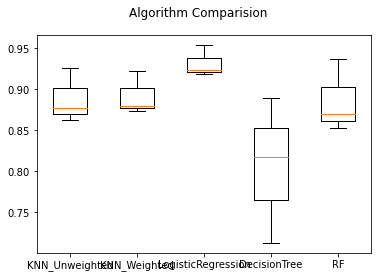

In [45]:
#Evaluating each odel in turn
results = []
names   = []
for name , model in models:
    kfold      = model_selection.KFold(shuffle = True ,  n_splits = 3 , random_state = 0)
    cv_results = model_selection.cross_val_score(model, X_scaled , Y ,cv = kfold , scoring = "roc_auc")
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_results) , np.var(cv_results,ddof = 1)))
    # boxplot algorithm comparision
fig  = plt.figure()
fig.suptitle("Algorithm Comparision")
ax   = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [46]:
# KNN_weighted is performing better as compared to other KNN_unweighted

In [47]:
# THe KNN_CLASSIFIER_unweighted average(bias error) : 0.918065 and variance error : 0.002070
# The LogisticRegression is better in term of variance error as compared to KNN_unweighted
# DT has HIgh bias error and high variance error

In [48]:
# Random Forest when comapred to DT
# Random Forest When compared to DT bias error is moderate and variance error is low

In [49]:
# Random forest comapred to other models
# Low bias erroe low variance error

# Gaussian Naive Bayes Manual Calculation

In [63]:
iris = pd.read_csv("Iris.csv")

In [68]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
iris["PetalLengthCm"].min() , iris["PetalLengthCm"].max() 

(1.0, 6.9)

In [72]:
iris["PetalWidthCm"].min() , iris["PetalWidthCm"].max() 

(0.1, 2.5)

In [67]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [57]:
df = iris.drop(labels = ["Id","SepalLengthCm","SepalWidthCm"] , axis = 1)

In [60]:
df.rename(columns = {"PetalLengthCm":"f3" , "PetalWidthCm" : "f4" , "Species":"class"},inplace = True)

In [62]:
# f3 and f4 are petal length and petal width
df.head()

,f3,f4,class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [73]:
# Defining user defined formula for normal or gaussian distribution
# For formula refer notebook
# gpdf gaussian probability distribution function
def my_gpdf(x , mean , sd):
    exponent = np.exp(-((x - mean)**2/(2*sd**2)))
    return (1/(np.sqrt(2*np.pi)*sd))*exponent

In [80]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

In [81]:
sc = StandardScaler()
X  = sc.fit_transform(df.iloc[:,:-1])

In [ ]:
# Once you convert the data using StandardScaler 
# DataFrame is converted to Numpy array

In [83]:
type(X)

numpy.ndarray

In [82]:
Xs = pd.DataFrame(X)
Xs.columns = ['x1','x2']
Xs.head()

,x1,x2
0,-1.341272,-1.312977
1,-1.341272,-1.312977
2,-1.398138,-1.312977
3,-1.284407,-1.312977
4,-1.341272,-1.312977


In [85]:
Xs["labels"] = df["class"]
df_seto = Xs[Xs["labels"] == "Iris-setosa"]
df_vc   = Xs[Xs["labels"] == "Iris-versicolor"]
df_virginica = Xs[Xs["labels"] == "Iris-virginica"]

In [86]:
df_seto.shape , df_vc.shape , df_virginica.shape

((50, 3), (50, 3), (50, 3))

In [ ]:
# Getting the class wise statistics

In [87]:
df_seto[["x1","x2"]].mean()

x1   -1.304878
x2   -1.255129
dtype: float64

In [88]:
df_seto[["x1","x2"]].std()

x1    0.098668
x2    0.140952
dtype: float64

In [89]:
df_vc[["x1","x2"]].mean()

x1    0.285087
x2    0.167409
dtype: float64

In [90]:
df_vc[["x1","x2"]].std()

x1    0.267218
x2    0.259991
dtype: float64

In [91]:
df_virginica[["x1","x2"]].mean()

x1    1.019792
x2    1.087720
dtype: float64

In [92]:
df_virginica[["x1","x2"]].std()

x1    0.313839
x2    0.361091
dtype: float64

In [98]:
df_seto.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,50.0,-1.304878,0.098668,-1.568735,-1.341272,-1.284407,-1.241757,-1.056944
x2,50.0,-1.255129,0.140952,-1.444450,-1.312977,-1.312977,-1.181504,-0.787085


In [97]:
df_vc.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,50.0,0.285087,0.267218,-0.431421,0.137236,0.336266,0.478430,0.762759
x2,50.0,0.167409,0.259991,-0.261193,0.001753,0.133226,0.396172,0.790591


In [99]:
df_virginica.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,50.0,1.019792,0.313839,0.421564,0.762759,1.018654,1.203468,1.786341
x2,50.0,1.087720,0.361091,0.264699,0.790591,1.053537,1.447956,1.710902


In [101]:
# Testing data
test1 = [0.53529 , 0.5276]     # Predicted as Versicolor
test2 = [-1.398 , -1.3129]     # Predicted as Setosa
test3 = [1.047 , 1.185]        # Predicted as Virginica


In [106]:
# Testing versicolor sample
# test3 = [1.047 , 1.185]
p_seto = my_gpdf(test3[0] , -1.304878 , 0.098668)*my_gpdf(test3[1] , -1.255129 , 0.140952)*(1/3)
p_vc   = my_gpdf(test3[0] , 0.285087 , 0.267218)*my_gpdf(test3[1] , 0.167409 , 0.259991)*(1/3)
p_vg   = my_gpdf(test3[0] , 1.019792 , 0.313839)*my_gpdf(test3[1] , 1.087720 , 0.361091)*(1/3)
print("Setosa:",p_seto,"Versicolor:", p_vc ,"Virginica: ",p_vg)
print("Max of all:",np.argmax([p_seto , p_vc , p_vg]))

Setosa: 1.339097437936306e-188 Versicolor: 6.180715843510243e-06 Virginica:  0.4497620614333546
Max of all: 2


In [ ]:
# p_seto ==> probability your test data belongs to setosa class
# p_vc   ==> probability your test data belongs to versiclor class
# p_vg   ==> probability your test data belongs to virginica class

# argmax returns index of a highest number
# Max of all ==> probability test data belongs to  virginica is highest

In [107]:
#testing whether test data belongs to setosa or not
# test1 = [0.53529 , 0.5276]
p_seto = my_gpdf(test1[0] , -1.304878 , 0.098668)*my_gpdf(test1[1] , -1.255129 , 0.140952)*(1/3)
p_vc   = my_gpdf(test1[0] , 0.285087 , 0.267218)*my_gpdf(test1[1] , 0.167409 , 0.259991)*(1/3)
p_vg   = my_gpdf(test1[0] , 1.019792 , 0.313839)*my_gpdf(test1[1] , 1.087720 , 0.361091)*(1/3)
print("Setosa:",p_seto,"Versicolor:", p_vc ,"Virginica: ",p_vg)
print("Max of all:",np.argmax([p_seto , p_vc , p_vg]))

Setosa: 2.0688834290990328e-110 Versicolor: 0.18867921332661355 Virginica:  0.04269270981555688
Max of all: 1


In [ ]:
# Test 1 data is predicted as Versicolor

In [109]:
#testing whether test data belongs to setosa or not
# test2 = [-1.398 , -1.3129] 
p_seto = my_gpdf(test2[0] , -1.304878 , 0.098668)*my_gpdf(test2[1] , -1.255129 , 0.140952)*(1/3)
p_vc   = my_gpdf(test2[0] , 0.285087 , 0.267218)*my_gpdf(test2[1] , 0.167409 , 0.259991)*(1/3)
p_vg   = my_gpdf(test2[0] , 1.019792 , 0.313839)*my_gpdf(test2[1] , 1.087720 , 0.361091)*(1/3)
print("Setosa:",p_seto,"Versicolor:", p_vc ,"Virginica: ",p_vg)
print("Max of all:",np.argmax([p_seto , p_vc , p_vg]))

Setosa: 2.246731057137385 Versicolor: 1.6933491560269706e-16 Virginica:  1.530640926146968e-23
Max of all: 0


In [ ]:
# Test 2 is classified as Setosa